NaN values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7159
         1.0       1.00      1.00      1.00      7103

    accuracy                           1.00     14262
   macro avg       1.00      1.00      1.00     14262
weighted avg       1.00      1.00      1.00     14262



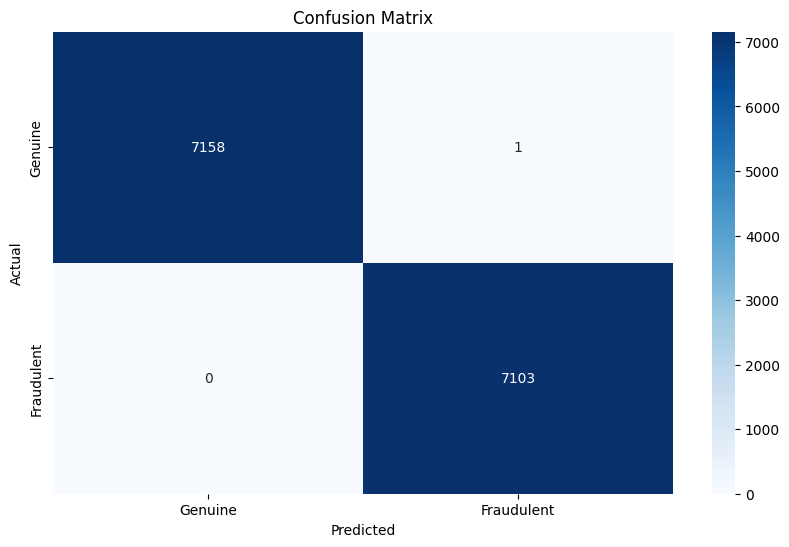

<ipython-input-2-c544043785fc>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_resampled, palette='viridis')


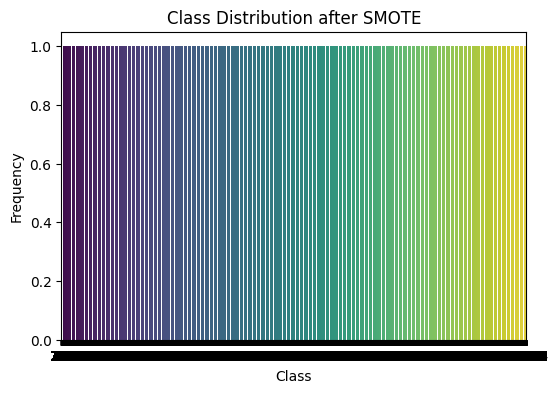

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Check for NaN values and handle them
print("NaN values in each column:\n", data.isnull().sum())

# Drop rows with NaN values
data = data.dropna()

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Normalize the data (excluding the 'Time' column)
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled.iloc[:, 1:-1] = scaler.fit_transform(X.iloc[:, 1:-1])

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraudulent'], yticklabels=['Genuine', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Distribution of the target variable after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(y_resampled, palette='viridis')
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
